In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/'
                 'breast-cancer-wisconsin/wdbc.data',header=None)

In [2]:
from sklearn.preprocessing import LabelEncoder
X= df.loc[:,2:].values
y= df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [3]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = \
    train_test_split(X,y,
                 test_size=0.20,
                 stratify=y,
                 random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1,solver='lbfgs'))
pipe_lr.fit(X_train,y_train)
y_pred= pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test,y_test))

Test Accuracy: 0.956


In [6]:
import numpy as np
from sklearn.model_selection import  StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores= []
for k ,(train,test)in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold: %2d, Class disr.: %s, Acc: %.3f'%(k+1,
                                                   np.bincount(y_train[train]),score))


Fold:  1, Class disr.: [256 153], Acc: 0.935
Fold:  2, Class disr.: [256 153], Acc: 0.935
Fold:  3, Class disr.: [256 153], Acc: 0.957
Fold:  4, Class disr.: [256 153], Acc: 0.957
Fold:  5, Class disr.: [256 153], Acc: 0.935
Fold:  6, Class disr.: [257 153], Acc: 0.956
Fold:  7, Class disr.: [257 153], Acc: 0.978
Fold:  8, Class disr.: [257 153], Acc: 0.933
Fold:  9, Class disr.: [257 153], Acc: 0.956
Fold: 10, Class disr.: [257 153], Acc: 0.956


In [7]:
print('\nCV accuray: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))



CV accuray: 0.950 +/- 0.014


In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)
print('\nCV accuray: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))


CV accuray: 0.950 +/- 0.014


In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           solver='lbfgs',
                                           max_iter=10000))

In [10]:
train_sizes,train_scores,test_scores=\
    learning_curve(estimator=pipe_lr,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.linspace(0.1,1.0,10),
                   cv=10,
                   n_jobs=-1)

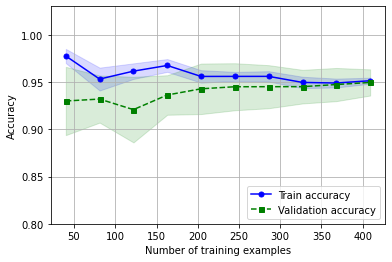

In [11]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)

test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,
         color='blue',marker='o',
         markersize=5,label='Train accuracy')
plt.fill_between(train_sizes,
                 train_mean+train_std,
                 train_mean-train_std,
                 alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,
         color='green',linestyle='--',
         marker='s',markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean+test_std,
                 test_mean-test_std,
                 alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.show()

(0.8, 1.0)

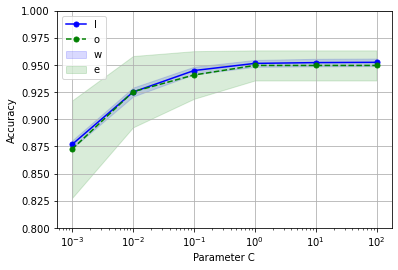

In [12]:
from sklearn.model_selection import validation_curve
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,
         color='blue',marker='o',
         markersize=5,label='training accuracy')
plt.fill_between(param_range,
                 train_mean+train_std,
                 train_mean-train_std,alpha=0.15,
                 color='blue')
plt.plot(param_range,test_mean,
         color='green',linestyle='--',marker='o',
         markersize=5,label='validation accuracy')
plt.fill_between(param_range,
                 test_mean+test_std,
                 test_mean-test_std,alpha=0.15,
                 color='green')
plt.grid()
plt.xscale('log')
plt.legend('lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.0])

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001,0.001,0.01,0.1,
               1.0,10.0,100.0,1000.0]

param_grid = [{'svc__C':param_range,
               'svc__kernel':['linear']},
              {'svc__C':param_range,
               'svc__gamma':param_range,
               'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [14]:
clf=gs.best_estimator_
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))


0.9736842105263158


In [15]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs,X_train,y_train,
                         scoring='accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f'%(np.mean(scores),
                                    np.std(scores)))

CV accuracy: 0.974 +/- 0.015


In [16]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


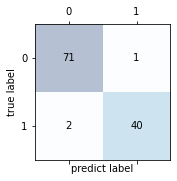

In [17]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
                s=confmat[i,j],
                va='center',ha='center')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(
    y_true=y_test,y_pred=y_pred))
print('Recall: %.3f'% recall_score(
    y_true=y_test,y_pred=y_pred))
print('F1: %.3f'%f1_score(
    y_true=y_test,y_pred=y_pred))


Precision: 0.976
Recall: 0.952
F1: 0.964


In [19]:
from sklearn.metrics import make_scorer
c_gamma_range=[0.01,0.1,1.0,10.0]
param_grid = [{'svc__C':c_gamma_range,
               'svc__kernel':['linear']},
              {'svc__C':c_gamma_range,
               'svc__gamma':c_gamma_range,
               'svc__kernel':['rbf']}]
scorer = make_scorer(f1_score,pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [20]:
from sklearn.metrics import roc_curve,auc
from scipy import interp
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           solver='lbfgs',C=100.0))


C:\Users\charles\.conda\envs\ML\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-21-c488e153211d>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr,fpr,tpr)
<ipython-input-21-c488e153211d>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr,fpr,tpr)
<ipython-input-21-c488e153211d>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr,fpr,tpr)


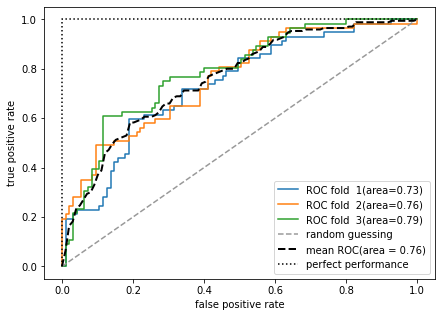

In [21]:
X_train2 = X_train[:,[4,14]]
cv = list(StratifiedKFold(n_splits=3,
                          random_state=1).split(X_train,
                                                y_train))
fig = plt.figure(figsize=(7,5))

mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i ,(train,test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])
    fpr,tpr,threshold = roc_curve(y_train[test],
                                  probas[:,1],
                                  pos_label=1)
    mean_tpr += interp(mean_fpr,fpr,tpr)
    mean_tpr[0]=0.0
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold % d(area=%0.2f)'
             % (i+1,roc_auc))
plt.plot([0,1],
         [0,1],
         linestyle='--',
         color=(0.6,0.6,0.6),
         label='random guessing')
mean_tpr/=len(cv)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr,'k--',
         label='mean ROC(area = %0.2f)'% mean_auc,lw=2)
plt.plot([0,0,1],
         [0,1,1],
         linestyle=':',
         color='black',
         label = 'perfect performance')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()